In [1]:
from ising_model import ClassicIsing
import electron
from grid import Grid, HoleGrid, Mobius, Cylinder, Torus
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def B_vs_T(grid, temps, mc_steps, runs_per_T, J = 1):

    # for each temperature, perform simulation and record magnetization
    magnetizations = []
    for T in temps:
        isingModel = ClassicIsing(grid, temperature=T, ferromagnetivity=J,Mf_External=0)

        # perform equilibration and measurement runs multiple times to average
        total_mag = 0
        for run in range(runs_per_T):
            isingModel.runSimulation(mc_steps)
            total_mag += isingModel.magnetization()

        # average magnetization for this temperature and record it
        avg_mag = total_mag / runs_per_T
        magnetizations.append(avg_mag)

        # reset the grid for the next temperature
        isingModel.resetSimulation()

    return magnetizations


Equilibrator

In [3]:
def equilibrate_grid(grid, tolerance=1e-1, mag_hist = False, J=1):
    """run the simulation until the grid equilibrates. That is, until the mean magnetization in the low temp regime
    stops changing significantly"""

    max_steps = grid.n_x * 10  # arbitrary large number of steps to prevent infinite loops

    temps = np.linspace(1, 1.2, 10)
    models = []

    # create a model for each temperature
    for T in temps:
        model = ClassicIsing(grid, temperature=T, ferromagnetivity=J, Mf_External=0)
        models.append(model)

    if mag_hist:
        total_hist = []

    # track average magnetizations by step
    avg_mags_hist = []
    for step in range(max_steps):
        mags = []
        # step each model once and record magnetizations
        for model in models:
            model.runSimulation(1)
            mags.append(model.magnetization())
        avg_mags = np.mean(mags)
        if mag_hist:
            total_hist.append(avg_mags)
        avg_mags_hist.append(avg_mags)
        if step > 0:
            # check past 5 steps for equilibration by how much the average magnetization has changed
            if np.all(np.abs(avg_mags_hist[-5:] - avg_mags) < tolerance):
                print(f"Equilibrated after {step} sweeps.")
                return total_hist if mag_hist else None

    print("Reached maximum steps without equilibration.")
    return total_hist if mag_hist else None


Equilibrated after 30 steps.


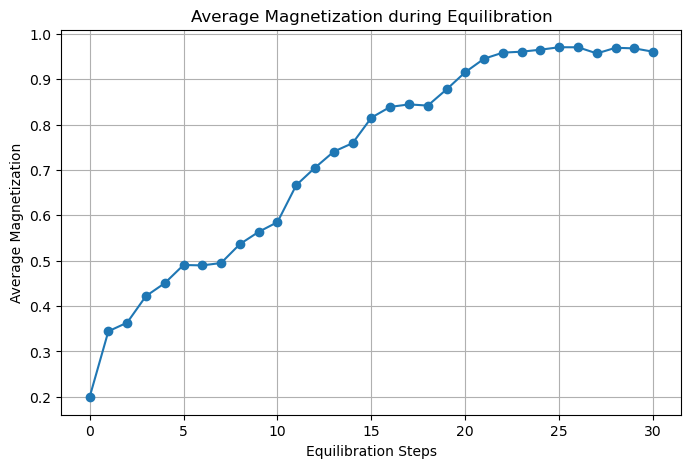

In [ ]:
N = 50            # Lattice size
J = 1           # Coupling constant
grid = Grid(n_x=N, n_y=N, gridPointObject=electron.ClassicElectron, record_history=False)
mags = equilibrate_grid(grid, tolerance=1e-2, mag_hist=True, J=J)

# plot the mean magnetization over time
plt.figure(figsize=(8, 5))
plt.plot(mags, marker='o')
plt.xlabel('Equilibration Steps')
plt.ylabel('Average Magnetization')
plt.title('Average Magnetization for low temperatures during Equilibration')
plt.grid()
plt.show()

Normal Grid Temperature vs Average Absolute Magnetization

Equilibrated after 61 steps.


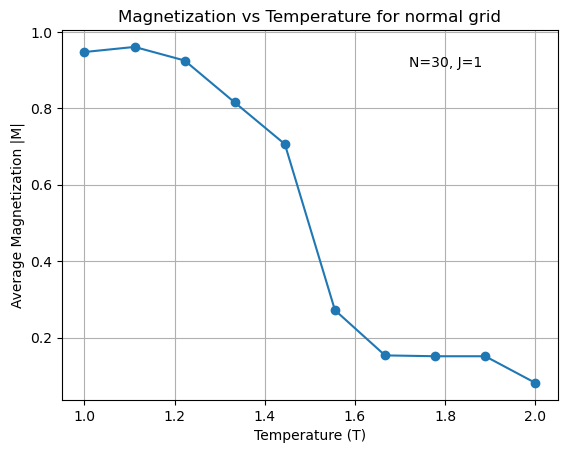

In [ ]:
# --- Parameters ---
N = 30              # Lattice size
J = 1                          # Coupling constant
temps = np.linspace(1, 2, 10)  # Temperature range
mc_steps = 500                   # sweeps for measurement
runs_per_T = 5                 # Average over multiple runs
# ------------------

basic_grid = Grid(n_x=N, n_y=N, gridPointObject=electron.ClassicElectron, record_history=False)
equilibrate_grid(basic_grid, tolerance=1e-2, mag_hist=False, J=J)
mags = B_vs_T(basic_grid, temps, mc_steps, runs_per_T)



# graphing the results
plt.plot(temps, mags, marker='o')
plt.xlabel('Temperature (T)')
plt.ylabel('Average Magnetization |M|')
plt.title('Magnetization vs Temperature for normal grid')
plt.text(0.7, 0.9, f'N={N}, J={J}', transform=plt.gca().transAxes)
#plt.legend()
plt.grid()
plt.show()

Grid with Hole Temperature vs Average Absolute Magnetization (UPDATE!)

In [7]:
N = 20            # Lattice size
J = 1           # Coupling constant
grid = HoleGrid(n_x=N, n_y=N, gridPointObject=electron.ClassicElectron, record_history=False)
mags = equilibrate_grid(grid, tolerance=1e-2, mag_hist=True, J=J)

# plot the mean magnetization over time
plt.figure(figsize=(8, 5))
plt.plot(mags, marker='o')
plt.xlabel('Equilibration Steps')
plt.ylabel('Average Magnetization')
plt.title('Average Magnetization for low temperatures during Equilibration')
plt.grid()
plt.show()

TypeError: HoleGrid.__init__() got an unexpected keyword argument 'record_history'

In [6]:
# --- Parameters ---
N = 20            # Lattice size
J = 1            # Coupling constant
temps = np.linspace(1, 2, 10)  # Temperature range
mc_steps = 30  # Steps for measurement
runs_per_T = 5    # Average over multiple runs

holeGrid = HoleGrid(n_x=10, n_y=10, gridPointObject=electron.ClassicElectron, hole_grid=np.ones((3,3)) ,c_y=2, c_x=2)
equilibrate_grid(holeGrid, tolerance=1e-2, mag_hist=False, J=J)
isingModel = ClassicIsing(holeGrid, temperature=temps[0], ferromagnetivity=J,Mf_External=0)

mags = B_vs_T(holeGrid, temps, mc_steps, runs_per_T)

# graphing the results
plt.plot(temps, mags, marker='o')
plt.xlabel('Temperature (T)')
plt.ylabel('Average Magnetization |M|')
plt.title('Magnetization vs Temperature for normal grid')
plt.text(0.7, 0.9, f'N={N}, J={J}', transform=plt.gca().transAxes)
#plt.legend()
plt.grid()
plt.show()

Reached maximum steps without equilibration.


KeyboardInterrupt: 

T=1.00, <|M|>=0.488
T=1.09, <|M|>=0.800
T=1.17, <|M|>=0.574
T=1.26, <|M|>=0.538
T=1.34, <|M|>=0.426
T=1.43, <|M|>=0.310
T=1.52, <|M|>=0.270
T=1.60, <|M|>=0.238
T=1.69, <|M|>=0.220
T=1.78, <|M|>=0.156
T=1.86, <|M|>=0.202
T=1.95, <|M|>=0.170
T=2.03, <|M|>=0.154
T=2.12, <|M|>=0.172
T=2.21, <|M|>=0.094
T=2.29, <|M|>=0.186
T=2.38, <|M|>=0.184
T=2.47, <|M|>=0.128
T=2.55, <|M|>=0.166
T=2.64, <|M|>=0.122
T=2.72, <|M|>=0.096
T=2.81, <|M|>=0.132
T=2.90, <|M|>=0.118
T=2.98, <|M|>=0.134
T=3.07, <|M|>=0.110
T=3.16, <|M|>=0.088
T=3.24, <|M|>=0.140
T=3.33, <|M|>=0.104
T=3.41, <|M|>=0.104
T=3.50, <|M|>=0.104


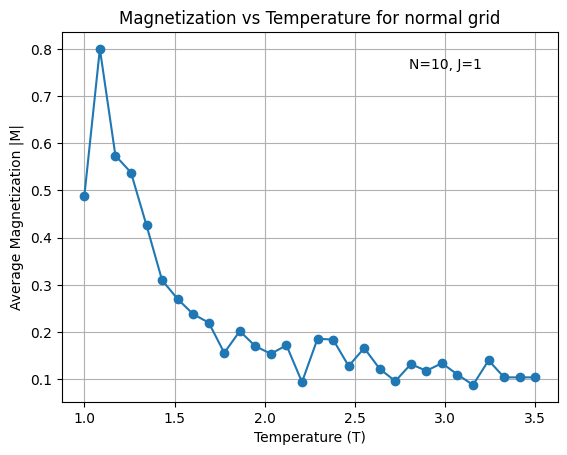

In [ ]:
# --- Parameters ---
N = 10            # Lattice size
J = 1            # Coupling constant
temps = np.linspace(1, 3.5, 30)  # Temperature range
eq_steps = 20  # Steps for equilibration
mc_steps = 30  # Steps for measurement
runs_per_T = 10    # Average over multiple runs

holeGrid = HoleGrid(n_x=10, n_y=10, gridPointObject=electron.ClassicElectron, random_seed=2, hole_grid=np.ones((3,3)) ,c_y=2, c_x=2)

isingModel = ClassicIsing(holeGrid, temperature=temps[0], ferromagnetivity=J,Mf_External=0)

def B_vs_T(temps, eq_steps, mc_steps, runs_per_T):
    magnetizations = []
    for T in temps:
        holeGrid = HoleGrid(n_x= N, n_y=N, gridPointObject=electron.ClassicElectron, random_seed=2, hole_grid=np.ones((3,3)) ,c_y=5, c_x=5)

        isingModel.grid = holeGrid
        isingModel.temperature = T
        total_mag = 0
        for run in range(runs_per_T):
            #equilibration
            isingModel.runSimulation(eq_steps)
            #measurement
            isingModel.runSimulation(mc_steps)
            # calculate magnetization
            total_mag += isingModel.magnetization()
        avg_mag = total_mag / runs_per_T
        magnetizations.append(avg_mag)
        print(f"T={T:.2f}, <|M|>={magnetizations[-1]:.3f}")
    return magnetizations

mags = B_vs_T(temps, eq_steps, mc_steps, runs_per_T)

# graphing the results
plt.plot(temps, mags, marker='o')
plt.xlabel('Temperature (T)')
plt.ylabel('Average Magnetization |M|')
plt.title('Magnetization vs Temperature for normal grid')
plt.text(0.7, 0.9, f'N={N}, J={J}', transform=plt.gca().transAxes)
#plt.legend()
plt.grid()
plt.show()

Mobius

T=1.00, <|M|>=0.939
T=1.09, <|M|>=0.940
T=1.17, <|M|>=0.930
T=1.26, <|M|>=0.849
T=1.34, <|M|>=0.809
T=1.43, <|M|>=0.706
T=1.52, <|M|>=0.589
T=1.60, <|M|>=0.488
T=1.69, <|M|>=0.427
T=1.78, <|M|>=0.253
T=1.86, <|M|>=0.285
T=1.95, <|M|>=0.329
T=2.03, <|M|>=0.205
T=2.12, <|M|>=0.249
T=2.21, <|M|>=0.201
T=2.29, <|M|>=0.164
T=2.38, <|M|>=0.167
T=2.47, <|M|>=0.189
T=2.55, <|M|>=0.165
T=2.64, <|M|>=0.165
T=2.72, <|M|>=0.148
T=2.81, <|M|>=0.150
T=2.90, <|M|>=0.134
T=2.98, <|M|>=0.133
T=3.07, <|M|>=0.156
T=3.16, <|M|>=0.157
T=3.24, <|M|>=0.172
T=3.33, <|M|>=0.095
T=3.41, <|M|>=0.135
T=3.50, <|M|>=0.167


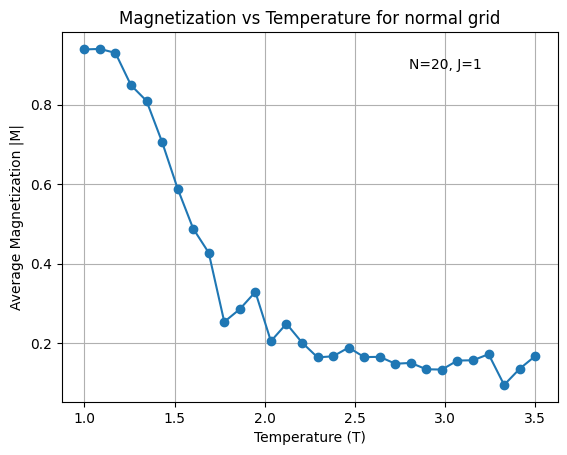

In [7]:
# --- Parameters ---
N = 20            # Lattice size
J = 1            # Coupling constant
temps = np.linspace(1, 3.5, 30)  # Temperature range
eq_steps = 20  # Steps for equilibration
mc_steps = 30  # Steps for measurement
runs_per_T = 30    # Average over multiple runs

mobiusGrid = Mobius(n_x=10, n_y=10, gridPointObject=electron.ClassicElectron, random_seed=2)

isingModel = ClassicIsing(mobiusGrid, temperature=temps[0], ferromagnetivity=J,Mf_External=0)

def B_vs_T(temps, eq_steps, mc_steps, runs_per_T):
    magnetizations = []
    for T in temps:
        mobiusGrid = Mobius(n_x=10, n_y=10, gridPointObject=electron.ClassicElectron, random_seed=2)


        isingModel.grid = mobiusGrid
        isingModel.temperature = T
        total_mag = 0
        for run in range(runs_per_T):
            #equilibration
            isingModel.runSimulation(eq_steps)
            #measurement
            isingModel.runSimulation(mc_steps)
            # calculate magnetization
            total_mag += isingModel.magnetization()
        avg_mag = total_mag / runs_per_T
        magnetizations.append(avg_mag)
        print(f"T={T:.2f}, <|M|>={magnetizations[-1]:.3f}")
    return magnetizations

mags = B_vs_T(temps, eq_steps, mc_steps, runs_per_T)

# graphing the results
plt.plot(temps, mags, marker='o')
plt.xlabel('Temperature (T)')
plt.ylabel('Average Magnetization |M|')
plt.title('Magnetization vs Temperature for normal grid')
plt.text(0.7, 0.9, f'N={N}, J={J}', transform=plt.gca().transAxes)
#plt.legend()
plt.grid()
plt.show()